## Preparing the environment

In [19]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read data
df = pd.read_csv("data/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Understanding the data

In [5]:
# number of rows and columns
df.shape

(17880, 18)

There are 18 columns and about 17K rows

In [6]:
# what are the columns?
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [10]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [21]:
# change data for categorical variables
categorical_col = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']
for col in categorical_col:
    df[col] = df[col].astype("category")

We expect there are a lot of text-based data, such as in columns like "description","benefits" and a lot of null values. It would be difficult to make use of those "string" columns, since it's nearly impossible to turn them into categorical variables. Just by looking at the first 5 rows, we notice that there are inconsistency in the values of categorical variables. We might need to clean them up later.

Our target variable is "fraudulent" which is 0 for real posting, and 1 for fake posting.

In [12]:
# what is the distribution of our classes (fraud or real)
df["fraudulent"].value_counts(normalize=True)

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

<AxesSubplot:>

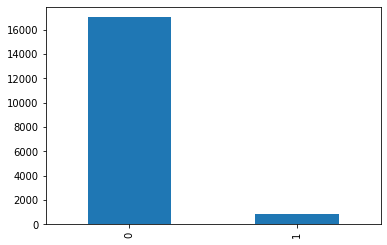

In [13]:
# bar chart for the target variable
df["fraudulent"].value_counts().plot(kind="bar")

There are only 866 observations (less than 5% of the whole data set) that were identified as "fraud". We have a very imbalanced data set and will need to work on improving the balance later.

In [12]:
# how "empty" is our data? How many null values for each variable?
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Variables like job_id, title, telecomuting or has_company_logo are often required or automatically determined during the job posting process. They don't have null values, which means there might NOT be a systematic error in the data collection process.

Most of the null values are in variables that job poster input. Unfortunately, we cannot acquire more data, or ask the users to fill in the null values.

### Explore the fake job postings

In [14]:
df_fake = df[df["fraudulent"] == 1]
df_fake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [25]:
df_fake.isnull().sum()

job_id                   0
title                    0
location                19
department             531
salary_range           643
company_profile        587
description              1
requirements           154
benefits               364
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        241
required_experience    435
required_education     451
industry               275
function               337
fraudulent               0
dtype: int64

<AxesSubplot:title={'center':'Frequencies of telecommuting variable'}, xlabel='telecommuting'>

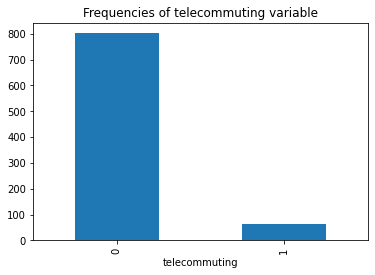

In [50]:
# is the job telecommuting?
df_fake["telecommuting"].value_counts().plot(kind="bar",xlabel="telecommuting", title="Frequencies of telecommuting variable")

Most fake jobs are not telecommuting.

<AxesSubplot:title={'center':'Frequencies of has_company_logo variable'}, xlabel='has_company_logo'>

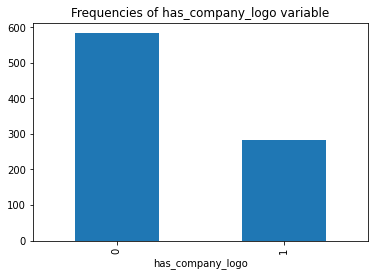

In [49]:
# does the job posting have company logo?
df_fake["has_company_logo"].value_counts().plot(kind="bar",xlabel="has_company_logo", title="Frequencies of has_company_logo variable")

About one-third of the fake job postings have company logos

<AxesSubplot:title={'center':'Frequencies of has_questions variable'}, xlabel='has_questions'>

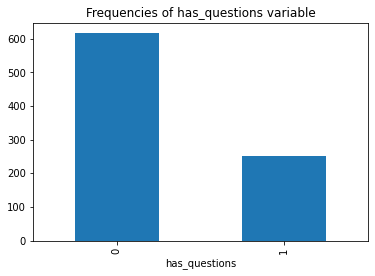

In [51]:
# does the job posting have questions?
df_fake["has_questions"].value_counts().plot(kind="bar",xlabel="has_questions", title="Frequencies of has_questions variable")

<AxesSubplot:title={'center':'Frequencies of employment_type variable'}, xlabel='employment_type'>

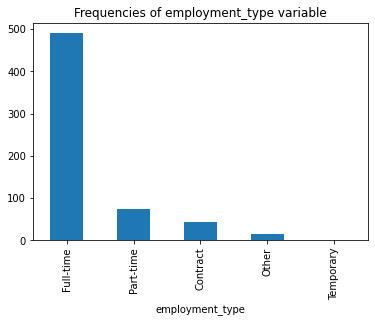

In [52]:
# what are the employment types?
df_fake["employment_type"].value_counts().plot(kind="bar",xlabel="employment_type", title="Frequencies of employment_type variable")

<AxesSubplot:title={'center':'Frequencies of required_experience variable'}, xlabel='required_experience'>

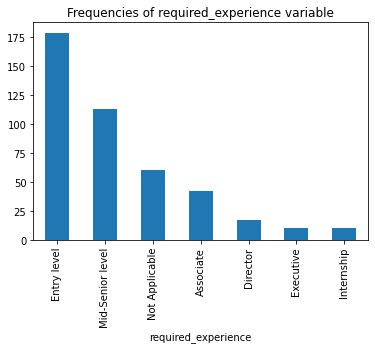

In [53]:
# what are the required experience?
df_fake["required_experience"].value_counts().plot(kind="bar",xlabel="required_experience", title="Frequencies of required_experience variable")

<AxesSubplot:title={'center':'Frequencies of required_education variable'}, xlabel='required_education'>

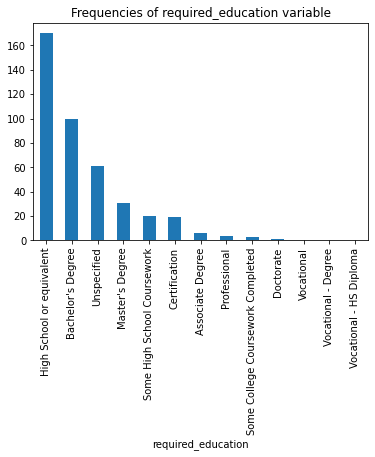

In [54]:
# what are the required education?
df_fake["required_education"].value_counts().plot(kind="bar",xlabel="required_education", title="Frequencies of required_education variable")

So far, we haven't found any obvious correlations or observations in the fake job postings.

## Handling imbalanced data set

### Oversampling the minority class

### Undersampling the majority class

## Feature Engineering

### Text processing

## EDA

## Modeling